In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree

#Machine Learning Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


#read_csv is used to read files in csv format 

filename='red_wine.csv'
columns=['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality']
#using pandas to load data
df=pd.read_csv(filename)

#data info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [2]:
#used to display attributes in data set 
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
# replace Nan values with median.
df=df.apply(lambda x: x.fillna(x.median()),axis=0)

#drop duplicates
df=df.drop_duplicates()
df


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


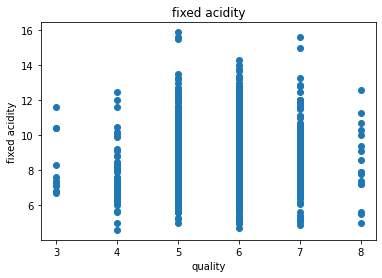

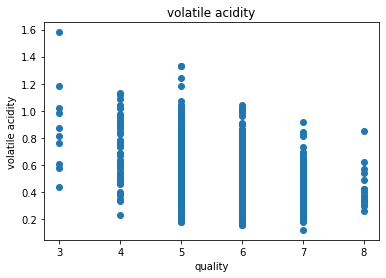

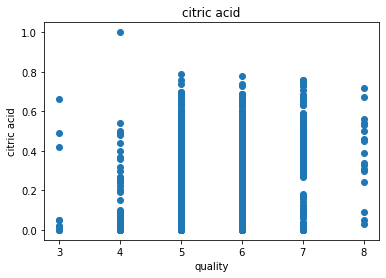

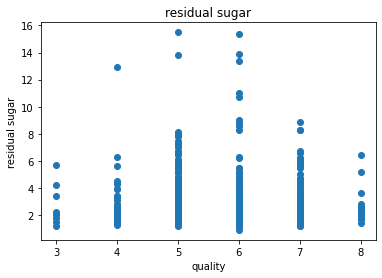

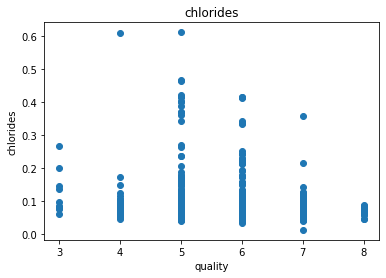

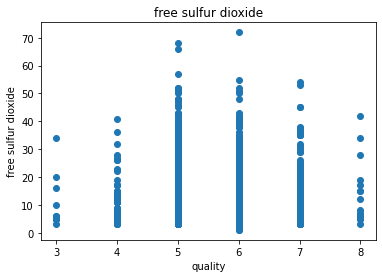

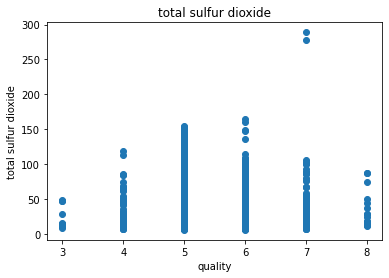

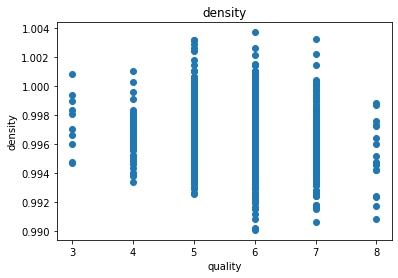

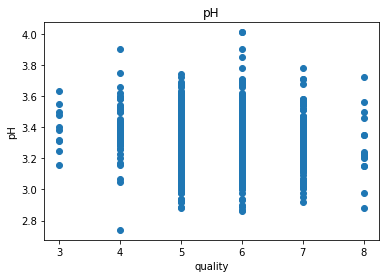

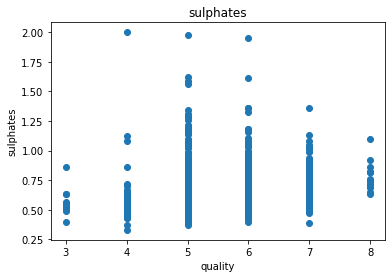

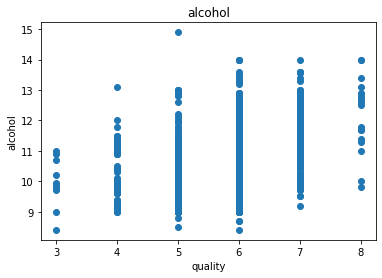

In [4]:


for label in df.columns[:-1]:

    plt.scatter(df['quality'], df[label])
    plt.title(label)
    plt.xlabel('quality')
    plt.ylabel(label)
   
    plt.show()

In [5]:
bins=[0,5,10]
labels=["1","2"]

#Used to split the values of quality into two classes 1 and 2
df['quality'] = pd.cut(df['quality'], bins=bins,labels=labels)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,1
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,2
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,2
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,1
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,2
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,1


In [6]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [7]:
df.dtypes

fixed acidity            float64
volatile acidity         float64
citric acid              float64
residual sugar           float64
chlorides                float64
free sulfur dioxide      float64
total sulfur dioxide     float64
density                  float64
pH                       float64
sulphates                float64
alcohol                  float64
quality                 category
dtype: object

In [8]:
X=df.loc[df['quality']=='1',['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1582,6.1,0.715,0.10,2.6,0.053,13.0,27.0,0.99362,3.57,0.50,11.9
1583,6.2,0.460,0.29,2.1,0.074,32.0,98.0,0.99578,3.33,0.62,9.8
1589,6.6,0.725,0.20,7.8,0.073,29.0,79.0,0.99770,3.29,0.54,9.2
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5


In [9]:
Y=df.loc[df['quality']=='2',['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
           'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density','pH', 'sulphates', 'alcohol']]
Y

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5
16,8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.99690,3.30,0.75,10.5
19,7.9,0.32,0.51,1.8,0.341,17.0,56.0,0.99690,3.04,1.08,9.2
...,...,...,...,...,...,...,...,...,...,...,...
1591,5.4,0.74,0.09,1.7,0.089,16.0,26.0,0.99402,3.67,0.56,11.6
1592,6.3,0.51,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1593,6.8,0.62,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5
1595,5.9,0.55,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2


In [10]:
X.shape

(640, 11)

In [11]:
Y.shape

(719, 11)

In [12]:
df['quality'].unique()

['1', '2']
Categories (2, object): ['1' < '2']

In [13]:
df['quality'].value_counts()

2    719
1    640
Name: quality, dtype: int64

C:\Users\Amogh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

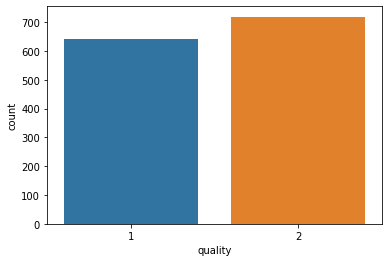

In [14]:
sns.countplot(df['quality'])

In [15]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [16]:
X

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 5.9  ,  0.55 ,  0.1  , ...,  3.52 ,  0.76 , 11.2  ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

In [17]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y =LabelEncoder()
y= labelencoder_y.fit_transform(y)

In [18]:
y

array([0, 0, 0, ..., 1, 0, 1])

In [19]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.21,random_state=421,shuffle=True)

X_trn,X_val,y_trn,y_val=train_test_split(X_train,y_train,test_size=0.26 ,random_state=421,shuffle=True)

In [20]:
print('The number of training data is', y_train.shape[0])
print('The number of test data is', y_test.shape[0])

The number of training data is 1073
The number of test data is 286


In [21]:
print('The number of training data is', y_trn.shape[0])
print('The number of test data is', y_val.shape[0])

The number of training data is 794
The number of test data is 279


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
df=pd.read_csv(filename)

df.columns
bins=[0,5,10]
labels=["1","2"]

df['quality'] = pd.cut(df['quality'], bins=bins,labels=labels)
df

from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train)

scaled_trainX = scaler.transform(X_train)      
scaled_testX = scaler.transform(X_test) 

print(scaled_trainX.shape, scaled_testX.shape, y_train.shape, y_test.shape)

(1073, 11) (286, 11) (1073,) (286,)


In [23]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y =LabelEncoder()
y= labelencoder_y.fit_transform(y)
y

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [24]:
# PCA 
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

PrincipalComponents = pca.fit_transform(scaled_trainX)

principalDf=pd.DataFrame(data=PrincipalComponents,columns=['PC 1','PC 2'])
principalDf.head()

,PC 1,PC 2
0,0.066417,1.071126
1,-1.316778,-0.334822
2,0.285747,4.101419
3,0.037944,0.189757
4,-1.567810,1.131213


In [25]:
df['quality'].head()

0    1
1    1
2    1
3    2
4    1
Name: quality, dtype: category
Categories (2, object): ['1' < '2']

In [26]:

finalDf = pd.concat([principalDf, df[['quality']]], axis = 1)
finalDf.head(5)

,PC 1,PC 2,quality
0,0.066417,1.071126,1
1,-1.316778,-0.334822,1
2,0.285747,4.101419,1
3,0.037944,0.189757,2
4,-1.567810,1.131213,1


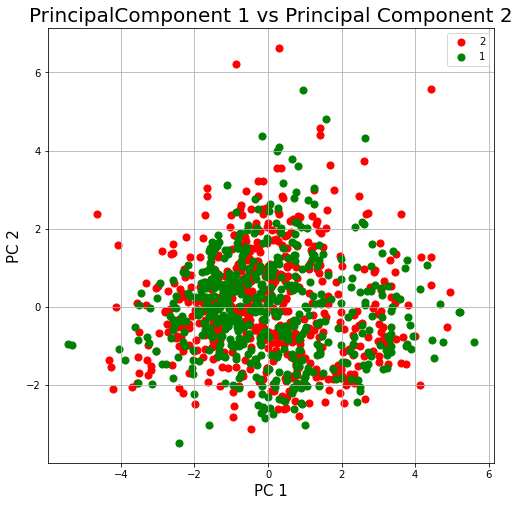

In [27]:

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC 1', fontsize = 15)
ax.set_ylabel('PC 2', fontsize = 15)
ax.set_title('PrincipalComponent 1 vs Principal Component 2', fontsize = 20)

targets = ['2','1']
color=['red','green']
for target,color in zip(targets,color):
    indicesToKeep = finalDf['quality'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC 1']
               , finalDf.loc[indicesToKeep, 'PC 2']
               , c = color
               , s = 50)

ax.legend(targets)
ax.grid()

In [28]:
pca.explained_variance_

array([3.08102827, 1.89642352])

In [29]:
pca.explained_variance_ratio_

array([0.27983244, 0.17224147])

Text(0, 0.5, 'The explained variance ratio')

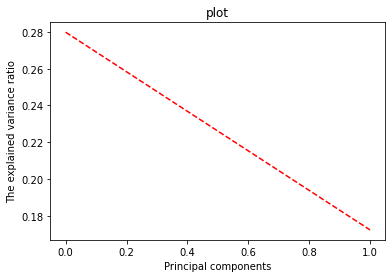

In [30]:
fig = plt.figure()
ax = plt.gca()

plt.plot(pca.explained_variance_ratio_,color='red', linestyle='--')
ax.set_title("plot")
ax.set_xlabel("Principal components")
ax.set_ylabel("The explained variance ratio")


In [31]:
#Correlation of matrix 
df=pd.read_csv(filename)
corr=df.corr()


<AxesSubplot:>

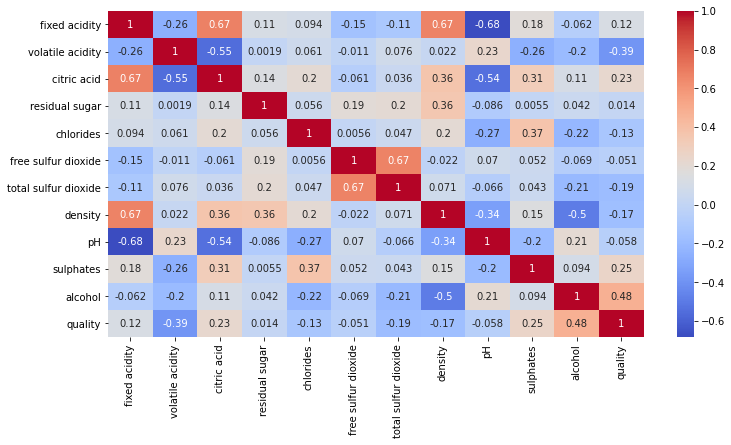

In [32]:
#correlation of matrix heat map 
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

In [33]:
#Train and Test

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.21,random_state=421,shuffle=True)

X_trn,X_val,y_trn,y_val=train_test_split(X_train,y_train,test_size=0.26,random_state=421,shuffle=True)

#Pre-Processing
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_trn)

scaled_trainX = scaler.transform(X_trn)      
scaled_testX = scaler.transform(X_val) 

print('The number of training data is', y_trn.shape[0])
print('The number of test data is', y_val.shape[0])


The number of training data is 794
The number of test data is 279


In [34]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
X

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

In [35]:
y

array([5, 5, 5, ..., 6, 5, 6], dtype=int64)

In [36]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y =LabelEncoder()
y= labelencoder_y.fit_transform(y)
y

array([2, 2, 2, ..., 3, 2, 3], dtype=int64)

# Logistic Regression

In [37]:
# Using Logistic Regression as the Machine Learning model 
from sklearn.linear_model import LogisticRegression

model=LogisticRegression(C=1.0,multi_class='ovr',solver='lbfgs',tol=1e-4)

model.fit(scaled_trainX,y_trn)

LogisticRegression(multi_class='ovr')

In [38]:
pred=model.predict(scaled_testX)

In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(y_val,pred)


0.7885304659498208

In [40]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.21,random_state=421,shuffle=True)

X_trn_,X_val_,y_trn_,y_val_=train_test_split(X_train,y_train,test_size=0.10,random_state=421,shuffle=True)

print('The number of training data is', y_trn_.shape[0])
print('The number of test data is', y_val_.shape[0])

The number of training data is 1136
The number of test data is 127


In [41]:
from sklearn import preprocessing

"""Note it should be fit on the training set only"""
scaler = preprocessing.StandardScaler().fit(X_trn_)
"""Apply scaling parameters on both the training set and the test set"""
scaled_trnX_1 = scaler.transform(X_trn_)      
scaled_tstX_1 = scaler.transform(X_val_) 

print(scaled_trnX_1.shape, scaled_tstX_1.shape, y_trn_.shape, y_val_.shape)

(1136, 11) (127, 11) (1136,) (127,)


In [42]:
from sklearn.linear_model import LogisticRegression

logis_reg = LogisticRegression()
logis_reg.fit(scaled_trnX_1, y_trn_)

y_prob = logis_reg.predict_proba(scaled_tstX_1)
y_pred = logis_reg.predict(scaled_tstX_1)

In [43]:
from sklearn import metrics

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_val_, y_pred))

Accuracy: 0.6062992125984252


In [44]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.21,random_state=421,shuffle=True)

X_trn_1,X_val_1,y_trn_1,y_val_1=train_test_split(X_train,y_train,test_size=0.20,random_state=421,shuffle=True)

print('The number of training data is', y_trn_1.shape[0])
print('The number of test data is', y_val_1.shape[0])

The number of training data is 1010
The number of test data is 253


In [45]:
from sklearn import preprocessing

"""Note it should be fit on the training set only"""
scaler = preprocessing.StandardScaler().fit(X_trn_1)
"""Apply scaling parameters on both the training set and the test set"""
scaled_trnX__1 = scaler.transform(X_trn_1)      
scaled_tstX__1 = scaler.transform(X_val_1) 

print(scaled_trnX__1.shape, scaled_tstX__1.shape, y_trn_1.shape, y_val_1.shape)

(1010, 11) (253, 11) (1010,) (253,)


In [46]:
from sklearn.linear_model import LogisticRegression

logis_reg = LogisticRegression()
logis_reg.fit(scaled_trnX__1, y_trn_1)

y__prob = logis_reg.predict_proba(scaled_tstX__1)
y__pred = logis_reg.predict(scaled_tstX__1)

In [47]:
from sklearn import metrics

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_val_1, y__pred))

Accuracy: 0.6205533596837944


In [48]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.21,random_state=421,shuffle=True)

X_trn_2,X_val_2,y_trn_2,y_val_2=train_test_split(X_train,y_train,test_size=0.30,random_state=421,shuffle=True)

print('The number of training data is', y_trn_2.shape[0])
print('The number of test data is', y_val_2.shape[0])

The number of training data is 884
The number of test data is 379


In [49]:
from sklearn import preprocessing

"""Note it should be fit on the training set only"""
scaler = preprocessing.StandardScaler().fit(X_trn_2)
"""Apply scaling parameters on both the training set and the test set"""
scaled_trnX__2 = scaler.transform(X_trn_2)      
scaled_tstX__2= scaler.transform(X_val_2) 

print(scaled_trnX__2.shape, scaled_tstX__2.shape, y_trn_2.shape, y_val_2.shape)

(884, 11) (379, 11) (884,) (379,)


In [50]:
from sklearn.linear_model import LogisticRegression

logis_reg = LogisticRegression()
logis_reg.fit(scaled_trnX__2, y_trn_2)

y__prob = logis_reg.predict_proba(scaled_tstX__2)
y__pred = logis_reg.predict(scaled_tstX__2)

In [51]:
from sklearn import metrics

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_val_2, y__pred))

Accuracy: 0.604221635883905


In [52]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.21,random_state=421,shuffle=True)

X_trn_3,X_val_3,y_trn_3,y_val_3=train_test_split(X_train,y_train,test_size=0.40,random_state=421,shuffle=True)

print('The number of training data is', y_trn_3.shape[0])
print('The number of test data is', y_val_3.shape[0])

The number of training data is 757
The number of test data is 506


In [53]:
from sklearn import preprocessing


scaler = preprocessing.StandardScaler().fit(X_trn_3)

scaled_trnX__3 = scaler.transform(X_trn_3)      
scaled_tstX__3= scaler.transform(X_val_3) 

print(scaled_trnX__3.shape, scaled_tstX__3.shape, y_trn_3.shape, y_val_3.shape)

(757, 11) (506, 11) (757,) (506,)


In [54]:
from sklearn.linear_model import LogisticRegression

logis_reg = LogisticRegression()
logis_reg.fit(scaled_trnX__3, y_trn_3)

y__prob = logis_reg.predict_proba(scaled_tstX__3)
y__pred = logis_reg.predict(scaled_tstX__3)

In [55]:
from sklearn import metrics

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_val_3, y__pred))

Accuracy: 0.5849802371541502


In [56]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.21,random_state=421,shuffle=True)

X_trn_4,X_val_4,y_trn_4,y_val_4=train_test_split(X_train,y_train,test_size=0.50,random_state=421,shuffle=True)

print('The number of training data is', y_trn_3.shape[0])
print('The number of test data is', y_val_3.shape[0])

The number of training data is 757
The number of test data is 506


In [57]:
from sklearn import preprocessing

"Fitting on training data"
scaler = preprocessing.StandardScaler().fit(X_trn_4)
"""Apply scaling parameters on both the training set and the test set"""
scaled_trnX__4 = scaler.transform(X_trn_4)      
scaled_tstX__4= scaler.transform(X_val_4) 

print(scaled_trnX__4.shape, scaled_tstX__4.shape, y_trn_4.shape, y_val_4.shape)

(631, 11) (632, 11) (631,) (632,)


In [58]:
from sklearn.linear_model import LogisticRegression

logis_reg = LogisticRegression()
logis_reg.fit(scaled_trnX__4, y_trn_4)

y__prob = logis_reg.predict_proba(scaled_tstX__4)
y__pred = logis_reg.predict(scaled_tstX__4)

In [59]:
from sklearn import metrics

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_val_4, y__pred))

Accuracy: 0.5822784810126582


In [60]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.21,random_state=421,shuffle=True)

X_trn_5,X_val_5,y_trn_5,y_val_5=train_test_split(X_train,y_train,test_size=0.60,random_state=421,shuffle=True)

print('The number of training data is', y_trn_5.shape[0])
print('The number of test data is', y_val_5.shape[0])

The number of training data is 505
The number of test data is 758


In [61]:
from sklearn import preprocessing


scaler = preprocessing.StandardScaler().fit(X_trn_5)

scaled_trnX__5 = scaler.transform(X_trn_5)      
scaled_tstX__5= scaler.transform(X_val_5) 

print(scaled_trnX__5.shape, scaled_tstX__5.shape, y_trn_5.shape, y_val_5.shape)

(505, 11) (758, 11) (505,) (758,)


In [62]:
from sklearn.linear_model import LogisticRegression

logis_reg = LogisticRegression()
logis_reg.fit(scaled_trnX__5, y_trn_5)

y__prob = logis_reg.predict_proba(scaled_tstX__5)
y__pred = logis_reg.predict(scaled_tstX__5)

In [63]:
from sklearn import metrics

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_val_5, y__pred))

Accuracy: 0.575197889182058


In [64]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.21,random_state=421,shuffle=True)

X_trn_6,X_val_6,y_trn_6,y_val_6=train_test_split(X_train,y_train,test_size=0.70,random_state=421,shuffle=True)

print('The number of training data is', y_trn_6.shape[0])
print('The number of test data is', y_val_6.shape[0])

The number of training data is 378
The number of test data is 885


In [65]:
from sklearn import preprocessing

"""Note it should be fit on the training set only"""
scaler = preprocessing.StandardScaler().fit(X_trn_6)
"""Apply scaling parameters on both the training set and the test set"""
scaled_trnX__6 = scaler.transform(X_trn_6)      
scaled_tstX__6= scaler.transform(X_val_6) 

print(scaled_trnX__6.shape, scaled_tstX__6.shape, y_trn_6.shape, y_val_6.shape)

(378, 11) (885, 11) (378,) (885,)


In [66]:

from sklearn.linear_model import LogisticRegression

logis_reg = LogisticRegression()
logis_reg.fit(scaled_trnX__6, y_trn_6)

y__prob = logis_reg.predict_proba(scaled_tstX__6)
y__pred = logis_reg.predict(scaled_tstX__6)

In [67]:
from sklearn import metrics

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_val_6, y__pred))

Accuracy: 0.5796610169491525


In [68]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.21,random_state=421,shuffle=True)

X_trn_7,X_val_7,y_trn_7,y_val_7=train_test_split(X_train,y_train,test_size=0.80,random_state=421,shuffle=True)

print('The number of training data is', y_trn_7.shape[0])
print('The number of test data is', y_val_7.shape[0])

The number of training data is 252
The number of test data is 1011


In [69]:
from sklearn import preprocessing

"""Note it should be fit on the training set only"""
scaler = preprocessing.StandardScaler().fit(X_trn_7)
"""Apply scaling parameters on both the training set and the test set"""
scaled_trnX__7 = scaler.transform(X_trn_7)      
scaled_tstX__7= scaler.transform(X_val_7) 

print(scaled_trnX__7.shape, scaled_tstX__7.shape, y_trn_7.shape, y_val_7.shape)

(252, 11) (1011, 11) (252,) (1011,)


In [70]:
from sklearn.linear_model import LogisticRegression

logis_reg = LogisticRegression()
logis_reg.fit(scaled_trnX__7, y_trn_7)

y__prob = logis_reg.predict_proba(scaled_tstX__7)
y__pred = logis_reg.predict(scaled_tstX__7)

In [71]:
from sklearn import metrics

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_val_7, y__pred))

Accuracy: 0.5628090999010881


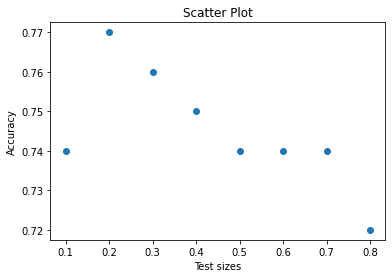

In [72]:
import matplotlib.pyplot as plt 
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
X=[0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80]
Y=[0.74,0.77,0.76,0.75,0.74,0.74,0.74,0.72]
plt.title('Scatter Plot')
plt.xlabel('Test sizes')
plt.ylabel('Accuracy')
ax.scatter(X,Y,marker='o')


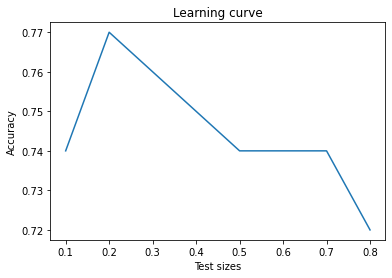

In [73]:
import matplotlib.pyplot as plt 
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
X=[0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80]
Y=[0.74,0.77,0.76,0.75,0.74,0.74,0.74,0.72]
plt.title('Learning curve')
plt.xlabel('Test sizes')
plt.ylabel('Accuracy')

plt.plot(X,Y)


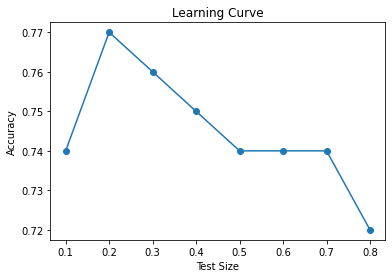

In [74]:
import matplotlib.pyplot as plt 
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
X=[0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80]
Y=[0.74,0.77,0.76,0.75,0.74,0.74,0.74,0.72]
plt.title('Learning Curve')
plt.xlabel('Test Size')
plt.ylabel('Accuracy')
plt.plot(X,Y,marker='o')


# Decision Tree

In [75]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
X

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

In [76]:
y

array([5, 5, 5, ..., 6, 5, 6], dtype=int64)

In [77]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y =LabelEncoder()
y= labelencoder_y.fit_transform(y)
y

array([2, 2, 2, ..., 3, 2, 3], dtype=int64)

In [78]:
from sklearn.model_selection import train_test_split

X__train__, X__test__, y__train__, y__test__ = train_test_split(X, y,test_size=0.21,  random_state=421)

X__train__.shape,X__test__.shape

((1263, 11), (336, 11))

In [79]:
from sklearn.tree import DecisionTreeClassifier

clf_dt= DecisionTreeClassifier(criterion='gini', max_depth=8, random_state=421)
clf_dt.fit(X__train__,y__train__)


DecisionTreeClassifier(max_depth=8, random_state=421)

In [80]:
y_pred_dt = clf_dt.predict(X__test__)

In [81]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y__test__,y_pred_dt)))

Model accuracy score with criterion gini index: 0.5923


In [82]:
y_pred_train_dt = clf_dt.predict(X__train__)

y_pred_train_dt

array([2, 2, 2, ..., 4, 2, 3], dtype=int64)

In [83]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y__train__, y_pred_train_dt)))

Training-set accuracy score: 0.8100


In [84]:

print('Training set score: {:.4f}'.format(clf_dt.score(X__train__, y__train__)))

print('Test set score: {:.4f}'.format(clf_dt.score(X__test__, y__test__)))

Training set score: 0.8100
Test set score: 0.5923


[Text(540.0671164772727, 513.4, 'X[10] <= 10.525\ngini = 0.646\nsamples = 1263\nvalue = [9, 41, 524, 512, 159, 18]'),
 Text(335.8700284090909, 453.0, 'X[6] <= 83.5\ngini = 0.549\nsamples = 768\nvalue = [7, 28, 444, 260, 27, 2]'),
 Text(204.09801136363637, 392.6, 'X[9] <= 0.575\ngini = 0.582\nsamples = 617\nvalue = [7, 25, 317, 239, 27, 2]'),
 Text(104.625, 332.2, 'X[10] <= 9.85\ngini = 0.506\nsamples = 239\nvalue = [4, 17, 157, 57, 4, 0]'),
 Text(57.06818181818182, 271.8, 'X[10] <= 9.05\ngini = 0.422\nsamples = 165\nvalue = [3, 13, 122, 26, 1, 0]'),
 Text(25.363636363636363, 211.39999999999998, 'X[0] <= 7.8\ngini = 0.66\nsamples = 10\nvalue = [1, 2, 2, 5, 0, 0]'),
 Text(12.681818181818182, 151.0, 'X[8] <= 3.43\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1, 0, 0, 0]'),
 Text(6.340909090909091, 90.59999999999997, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0, 0, 0, 0]'),
 Text(19.022727272727273, 90.59999999999997, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0, 0, 0]'),
 Text(38.045454545454

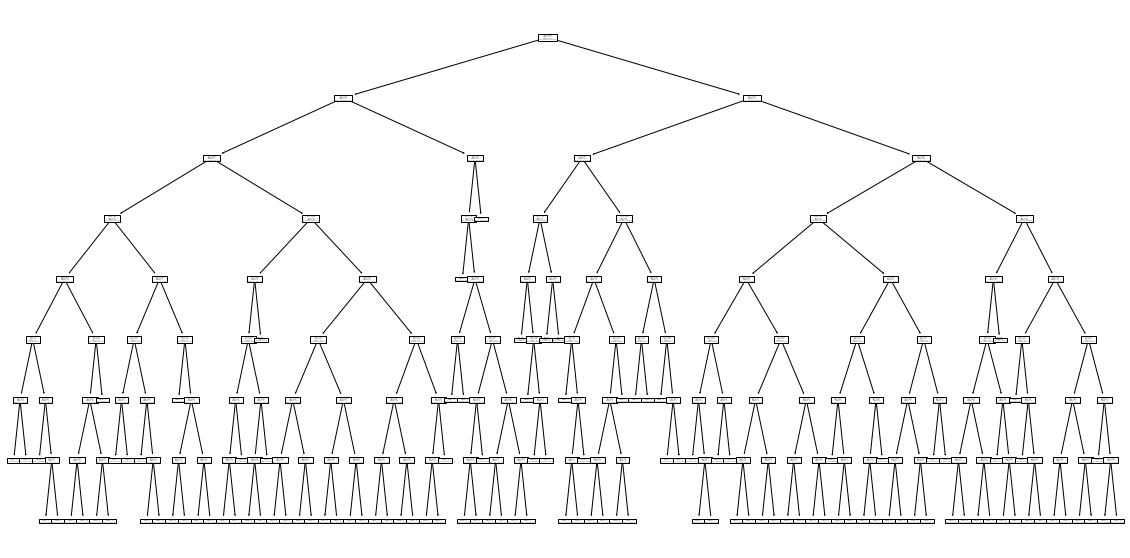

In [85]:
plt.figure(figsize=(20,10))

from sklearn import tree

tree.plot_tree(clf_dt.fit(X__train__, y__train__)) 


In [86]:

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y__test__, y_pred_dt)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[  0   0   1   0   0   0]
 [  0   1   7   4   0   0]
 [  1   5 100  49   2   0]
 [  0   0  34  83   8   1]
 [  0   0   5  20  15   0]
 [  0   0   0   0   0   0]]


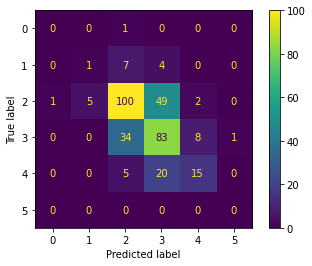

In [87]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf_dt,X__test__,y__test__)


In [88]:
path=clf_dt.cost_complexity_pruning_path(X__train__,y__train__)
ccp_alphas=path.ccp_alphas
ccp_alphas=ccp_alphas[:-1]

clf_dts=[]

for ccp_alpha in ccp_alphas:
    clf_dt=DecisionTreeClassifier(random_state=421,ccp_alpha=ccp_alpha)
    clf_dt.fit(X__train__,y__train__)
    clf_dts.append(clf_dt)

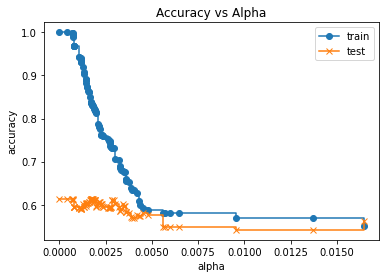

In [89]:
train_scores=[clf_dt.score(X__train__,y__train__) for clf_dt in clf_dts]
test_scores=[clf_dt.score(X__test__,y__test__) for clf_dt in clf_dts]

fig, ax=plt.subplots(1,1)
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title('Accuracy vs Alpha')
ax.plot(ccp_alphas,train_scores,marker='o',label='train',drawstyle='steps-post')
ax.plot(ccp_alphas,test_scores,marker='x',label='test',drawstyle='steps-post')
ax.legend()


<AxesSubplot:xlabel='tree'>

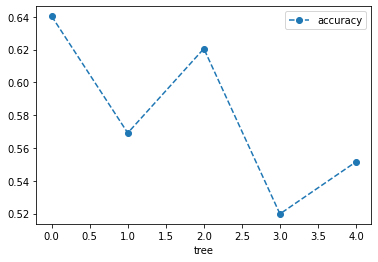

In [90]:
clf_dt=DecisionTreeClassifier(random_state=421,ccp_alpha=0.003)
scores=cross_val_score(clf_dt,X__train__,y__train__,cv=5)
df=pd.DataFrame(data={'tree': range(5),'accuracy':scores})

df.plot(x='tree',y='accuracy',marker='o',linestyle='--')


<AxesSubplot:xlabel='alpha'>

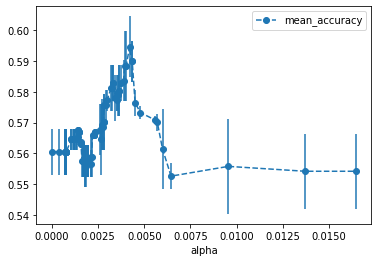

In [91]:
alpha_loop_values=[]

for ccp_alpha in ccp_alphas:
    clf_dt=DecisionTreeClassifier(random_state=421,ccp_alpha=ccp_alpha)
    scores=cross_val_score(clf_dt,X__train__,y__train__,cv=2)
    alpha_loop_values.append([ccp_alpha,np.mean(scores),np.std(scores)])

alpha_results=pd.DataFrame(alpha_loop_values,columns=['alpha','mean_accuracy','std'])
alpha_results.plot(x='alpha',y='mean_accuracy',yerr='std',marker='o',linestyle='--')

In [92]:
alpha_results[(alpha_results['alpha']>0.0025)&(alpha_results['alpha']<0.0050)]

,alpha,mean_accuracy,std
57,0.002628,0.567689,0.008260
58,0.002672,0.564520,0.011430
59,0.002717,0.569273,0.008259
60,0.002733,0.568482,0.007468
61,0.002762,0.568482,0.007468
62,0.002806,0.570064,0.009050
63,0.002806,0.570064,0.009050
64,0.002826,0.575612,0.001920
65,0.002837,0.575612,0.001920
66,0.002937,0.575610,0.005087


In [93]:
alpha_results[(alpha_results['alpha']>0.0042)&(alpha_results['alpha']<0.0043)]

,alpha,mean_accuracy,std
82,0.004213,0.594608,0.009822


In [94]:
ideal_ccp_alpha=alpha_results[(alpha_results['alpha']>0.0042)&(alpha_results['alpha']<0.0043)]['alpha']
ideal_ccp_alpha


82    0.004213
Name: alpha, dtype: float64

In [95]:
ideal_ccp_alpha= float(ideal_ccp_alpha)

ideal_ccp_alpha

0.0042126358184184365

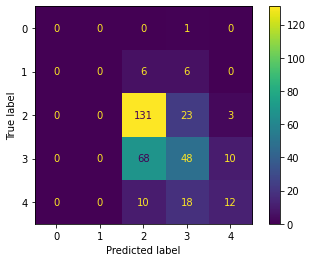

In [96]:
clf_dt_pruned=DecisionTreeClassifier(random_state=421,max_depth=2,ccp_alpha=ideal_ccp_alpha)
clf_dt_pruned=clf_dt_pruned.fit(X__train__,y__train__)

plot_confusion_matrix(clf_dt_pruned,X__test__,y__test__)

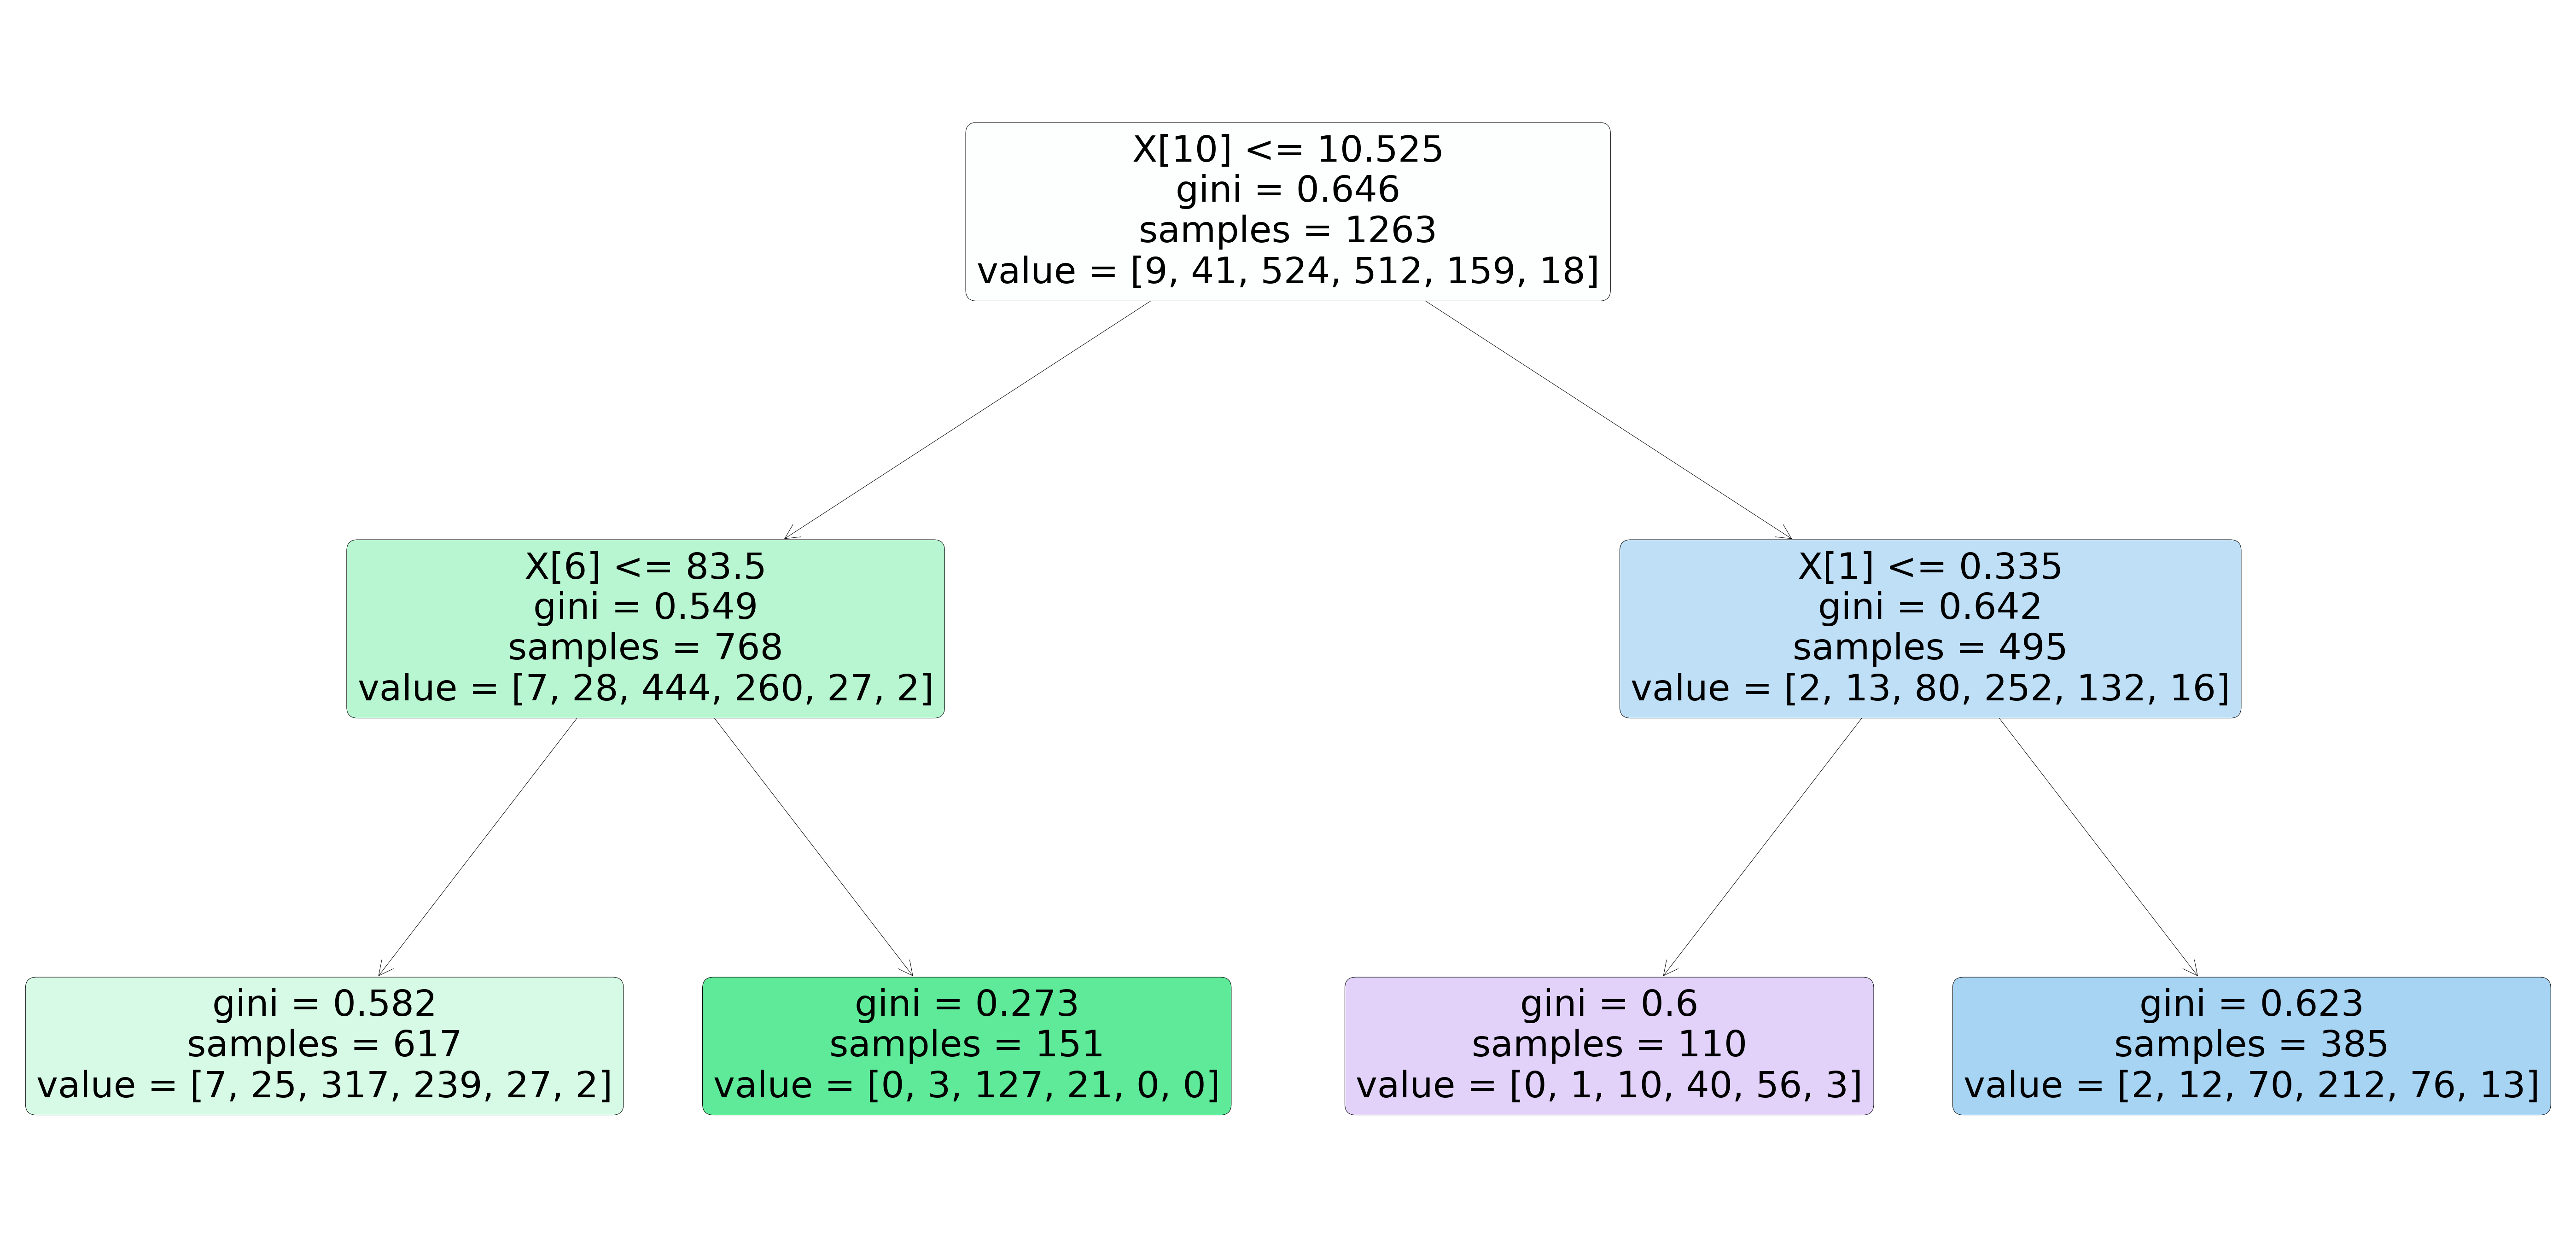

In [97]:
plt.figure(figsize=(100,50))
plot_tree(clf_dt_pruned,filled=True,rounded=True);

# Random Forest

In [98]:
# Train and fit Random Forest
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


X___train_, X___test_, y___train_, y___test_ = train_test_split(X, y, test_size=.21, random_state=421)





In [99]:
rf=RandomForestClassifier(n_estimators=100,criterion='entropy')
rf.fit(X___train_,y___train_)
prediction_test=rf.predict(X___test_)

print('Training accuracy score:', rf.score(X___train_,y___train_))
print('Testing accuracy score:', rf.score(X___test_,y___test_)) 

Training accuracy score: 1.0
Testing accuracy score: 0.6815476190476191


In [100]:
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':15})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

<ipython-input-101-f1f452b479ac>:2: RuntimeWarning: invalid value encountered in true_divide
  cm_norm = cm/cm.sum(axis=1)[: ,np.newaxis]


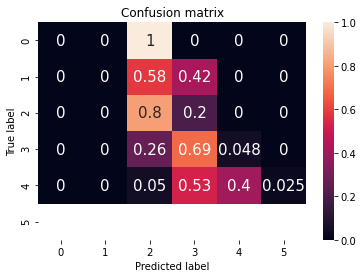

In [101]:
cm = confusion_matrix(y___test_, prediction_test)
cm_norm = cm/cm.sum(axis=1)[: ,np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=rf.classes_)

Classification accuracy on test set with max features = 1 and max_depth = None: 0.673
Classification accuracy on test set with max features = 1 and max_depth = 2: 0.574
Classification accuracy on test set with max features = 1 and max_depth = 3: 0.592
Classification accuracy on test set with max features = 1 and max_depth = 4: 0.598
Classification accuracy on test set with max features = 1 and max_depth = 5: 0.613
Classification accuracy on test set with max features = sqrt and max_depth = None: 0.667
Classification accuracy on test set with max features = sqrt and max_depth = 2: 0.568
Classification accuracy on test set with max features = sqrt and max_depth = 3: 0.583
Classification accuracy on test set with max features = sqrt and max_depth = 4: 0.607
Classification accuracy on test set with max features = sqrt and max_depth = 5: 0.622
Classification accuracy on test set with max features = log2 and max_depth = None: 0.667
Classification accuracy on test set with max features = log2

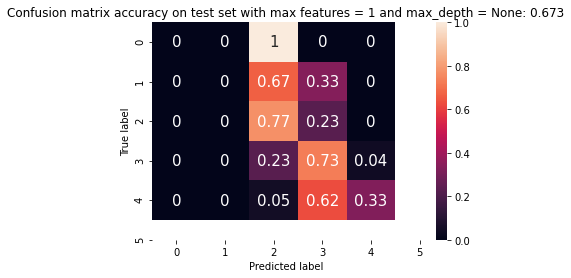

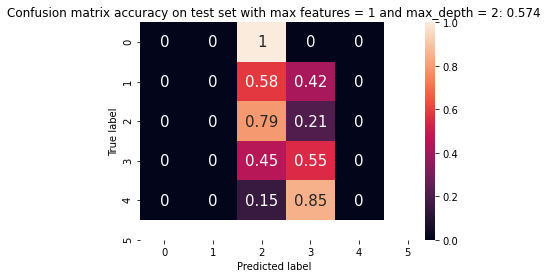

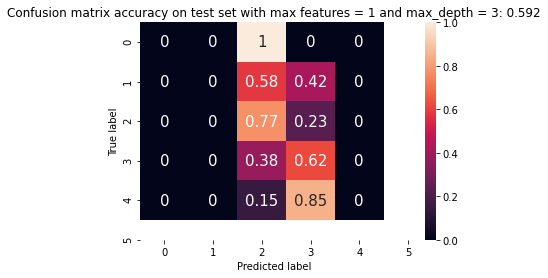

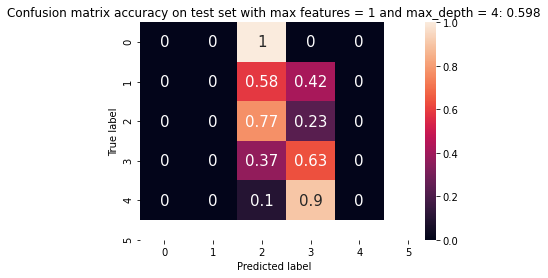

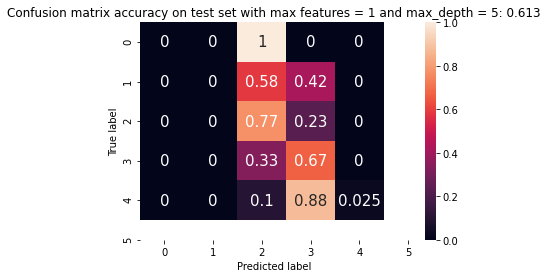

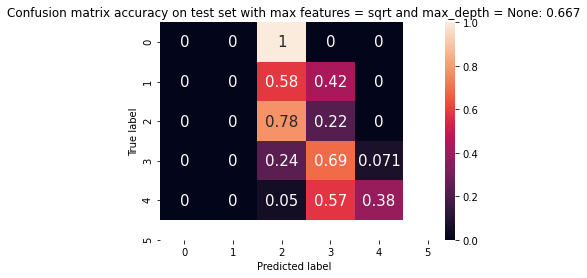

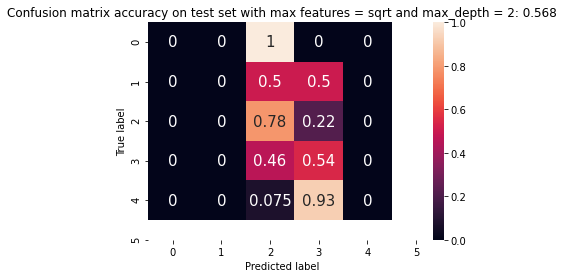

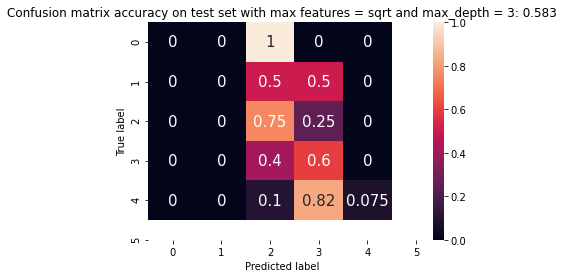

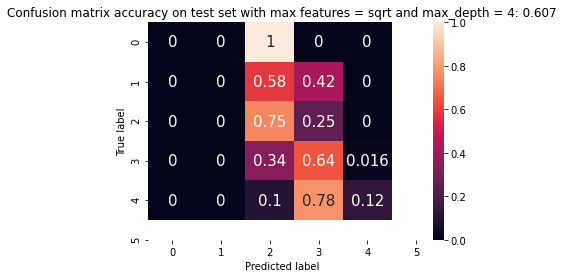

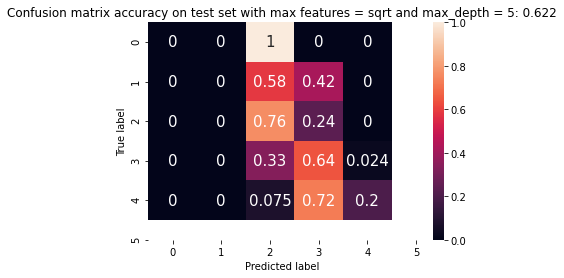

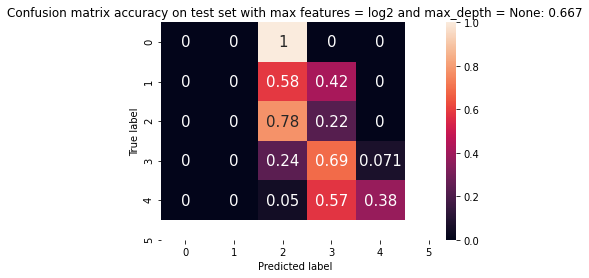

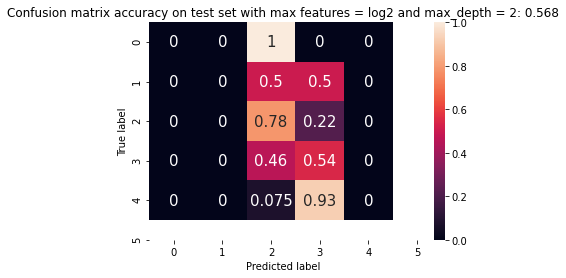

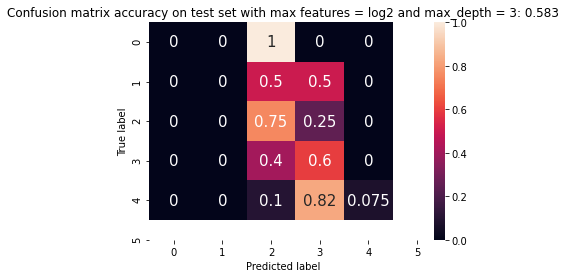

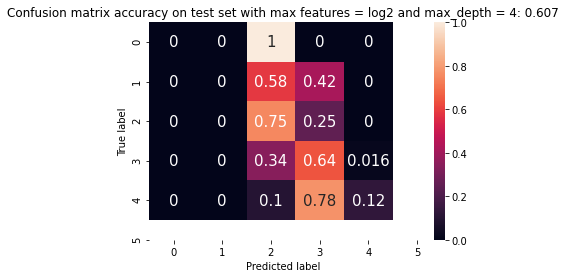

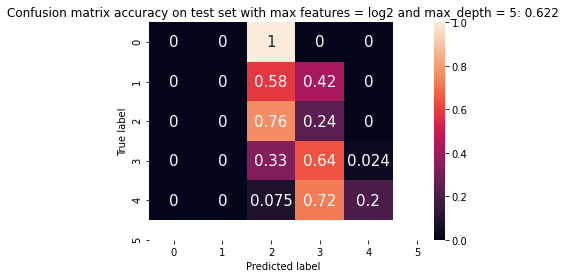

In [102]:
#tune RF
from itertools import product
n_estimators = 100
max_features = [1, 'sqrt', 'log2']
max_depths = [None, 2, 3, 4, 5]
for f, d in product(max_features, max_depths): # with product we can iterate through all possible combinations
    rf = RandomForestClassifier(n_estimators=n_estimators, 
                                criterion='entropy', 
                                max_features=f, 
                                max_depth=d, 
                                n_jobs=2,
                                random_state=1337)
    rf.fit(X___train_, y___train_)
    prediction_test = rf.predict(X___test_)
    print('Classification accuracy on test set with max features = {} and max_depth = {}: {:.3f}'.format(f, d, accuracy_score(y___test_,prediction_test)))
    cm = confusion_matrix(y___test_, prediction_test)
    cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
    plt.figure()
    plot_confusion_matrix(cm_norm, classes=rf.classes_,
    title='Confusion matrix accuracy on test set with max features = {} and max_depth = {}: {:.3f}'.format(f, d, accuracy_score(y___test_,prediction_test)))

# XGBoost


In [103]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost

classifier=xgboost.XGBClassifier(tree_method='gpu_hist')

params={
    "learning_rate":[0.05,0.10,0.15,0.20,0.25,0.30],
    "max_depth":[2,3,4,5,6,8,10,12,15],
    "min_child_weight":[1,3,5,7],
    "gamma":[0.0,0.1,0.2,0.3,0.4],
    "colsample_bytree":[0.3,0.4,0.5,0.7]}

clf =RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',cv=5,verbose=3)

clf.fit(X,y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


C:\Users\Amogh\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:14:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Amogh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Amogh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Amogh\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\Amogh\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
C:\Users\Amogh\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this

[CV 1/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=3; total time=   3.0s
[21:14:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Amogh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Amogh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Amogh\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\Amogh\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
C:\Users\Amogh\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this

[CV 2/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=3; total time=   1.5s
[21:14:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Amogh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Amogh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Amogh\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\Amogh\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
C:\Users\Amogh\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this

[CV 3/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=3; total time=   1.4s
[21:14:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Amogh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Amogh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Amogh\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\Amogh\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
C:\Users\Amogh\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this

[CV 4/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=3; total time=   1.4s
[21:14:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Amogh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Amogh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Amogh\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\Amogh\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
C:\Users\Amogh\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this

[CV 5/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=3; total time=   1.4s
[21:14:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Amogh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Amogh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Amogh\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\Amogh\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
C:\Users\Amogh\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this

[CV 1/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.3, max_depth=6, min_child_weight=5; total time=   1.2s
[21:14:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Amogh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Amogh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Amogh\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\Amogh\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
C:\Users\Amogh\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this

[CV 2/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.3, max_depth=6, min_child_weight=5; total time=   1.2s
[21:14:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Amogh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Amogh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Amogh\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\Amogh\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
C:\Users\Amogh\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this

[CV 3/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.3, max_depth=6, min_child_weight=5; total time=   1.2s
[21:14:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Amogh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Amogh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Amogh\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\Amogh\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
C:\Users\Amogh\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this

[CV 4/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.3, max_depth=6, min_child_weight=5; total time=   1.2s
[21:14:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Amogh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Amogh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Amogh\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\Amogh\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
C:\Users\Amogh\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this

[CV 5/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.3, max_depth=6, min_child_weight=5; total time=   1.2s
[21:14:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Amogh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Amogh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Amogh\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\Amogh\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
C:\Users\Amogh\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this

[CV 1/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.3, max_depth=6, min_child_weight=1; total time=   1.4s
[21:14:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Amogh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Amogh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Amogh\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\Amogh\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
C:\Users\Amogh\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this

[CV 2/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.3, max_depth=6, min_child_weight=1; total time=   1.4s
[21:14:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Amogh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Amogh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Amogh\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\Amogh\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
C:\Users\Amogh\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this

[CV 3/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.3, max_depth=6, min_child_weight=1; total time=   1.4s
[21:14:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Amogh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Amogh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Amogh\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\Amogh\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
C:\Users\Amogh\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this

[CV 4/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.3, max_depth=6, min_child_weight=1; total time=   1.3s
[21:14:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Amogh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Amogh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Amogh\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\Amogh\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
C:\Users\Amogh\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this

[CV 5/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.3, max_depth=6, min_child_weight=1; total time=   1.3s
[21:14:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Amogh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Amogh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Amogh\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\Amogh\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
C:\Users\Amogh\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this

[CV 1/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.15, max_depth=8, min_child_weight=3; total time=   2.0s
[21:14:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Amogh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Amogh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Amogh\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\Amogh\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
C:\Users\Amogh\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this

[CV 2/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.15, max_depth=8, min_child_weight=3; total time=   2.0s
[21:14:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Amogh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Amogh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Amogh\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\Amogh\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
C:\Users\Amogh\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this

[CV 3/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.15, max_depth=8, min_child_weight=3; total time=   2.0s
[21:14:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Amogh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Amogh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Amogh\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\Amogh\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
C:\Users\Amogh\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this

[CV 4/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.15, max_depth=8, min_child_weight=3; total time=   2.1s
[21:14:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Amogh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Amogh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Amogh\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\Amogh\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
C:\Users\Amogh\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this

[CV 5/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.15, max_depth=8, min_child_weight=3; total time=   2.1s
[21:14:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Amogh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Amogh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Amogh\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\Amogh\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
C:\Users\Amogh\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this

[CV 1/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.15, max_depth=15, min_child_weight=7; total time=   1.9s
[21:14:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Amogh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Amogh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Amogh\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\Amogh\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
C:\Users\Amogh\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this

[CV 2/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.15, max_depth=15, min_child_weight=7; total time=   1.9s
[21:14:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Amogh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Amogh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Amogh\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\Amogh\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
C:\Users\Amogh\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this

[CV 3/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.15, max_depth=15, min_child_weight=7; total time=   1.9s
[21:14:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Amogh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Amogh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Amogh\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\Amogh\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
C:\Users\Amogh\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this

[CV 4/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.15, max_depth=15, min_child_weight=7; total time=   1.8s
[21:14:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Amogh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Amogh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Amogh\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\Amogh\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
C:\Users\Amogh\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan]
  warnings.warn(
C:\Users\A

[CV 5/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.15, max_depth=15, min_child_weight=7; total time=   1.8s
[21:14:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           reg_lambda=None,
                                           scale_pos_weight=None,
                                           subsample=No

In [104]:
clf.best_params_

{'min_child_weight': 3,
 'max_depth': 4,
 'learning_rate': 0.2,
 'gamma': 0.2,
 'colsample_bytree': 0.7}

In [105]:
clf.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.2, gpu_id=0,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=4,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='gpu_hist', validate_parameters=1, verbosity=None)

[21:14:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "scale_pos_weight" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:14:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


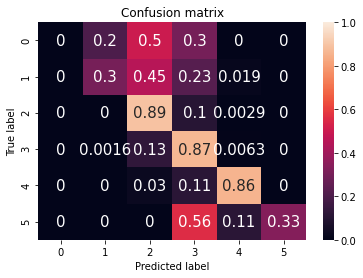

In [106]:
final_model = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.3, gpu_id=0,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=4,
              min_child_weight=5,  monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='gpu_hist', validate_parameters=1, verbosity=None)


final_model.fit(X,y)

pred_xgboost = final_model.predict(X)



cm = confusion_matrix(y, pred_xgboost)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=rf.classes_)

In [154]:
# train and test 

X_train__, X_test__, y_train__, y_test__ = train_test_split(X, y, test_size=0.21, random_state=421)

X_train__.shape, X_test__.shape


((1263, 11), (336, 11))

In [155]:
# XGB 

import xgboost as xgb 
from xgboost import XGBClassifier, plot_importance

xgb = XGBClassifier(objective='binary:logistic', random_state=421, n_jobs=-1)
xgb.fit(X_train__, y_train__)

C:\Users\Amogh\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:23:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              objective='multi:softprob', random_state=421, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [165]:
xgb_predictions = xgb.predict(X_test__)

sc=accuracy_score(y_test__, xgb_predictions)

print("The Accuracy Score is :",sc)

The Accuracy Score is : 0.6547619047619048


In [168]:
# Logistic Regresion
from sklearn.linear_model import LogisticRegression

model=LogisticRegression(C=1.0,multi_class='ovr',solver='lbfgs',tol=1e-4)

model.fit(scaled_trainX,y_trn)

pred=model.predict(scaled_testX)

print( classification_report(y_val, pred))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79       140
           1       0.78      0.80      0.79       139

    accuracy                           0.79       279
   macro avg       0.79      0.79      0.79       279
weighted avg       0.79      0.79      0.79       279



In [169]:
#Decision Tree

dt = DecisionTreeClassifier()
dt.fit(X__train__, y__train__)
pred_dt = dt.predict(X__test__)
print(classification_report(y__test__, pred_dt))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00        12
           2       0.67      0.68      0.67       157
           3       0.55      0.57      0.56       126
           4       0.55      0.42      0.48        40
           5       0.00      0.00      0.00         0

    accuracy                           0.58       336
   macro avg       0.29      0.28      0.28       336
weighted avg       0.58      0.58      0.58       336



C:\Users\Amogh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Amogh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Amogh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Amogh\anaconda3\lib\site-packages\sklearn\metrics\_cla

In [153]:
#Random Forest Tree Classifier
rf = RandomForestClassifier()
rf.fit(X___train_, y___train_)
pred_rf = rf.predict(X___test_)
print(classification_report(y___test_, pred_rf))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00        12
           2       0.77      0.78      0.78       157
           3       0.59      0.72      0.65       126
           4       0.65      0.38      0.48        40

    accuracy                           0.68       336
   macro avg       0.40      0.38      0.38       336
weighted avg       0.66      0.68      0.66       336



C:\Users\Amogh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Amogh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Amogh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [172]:
#XGB

xgb = XGBClassifier(objective='binary:logistic', random_state=421, n_jobs=-1)
xgb.fit(X_train__, y_train__)
xgb_predictions = xgb.predict(X_test__)
print(classification_report(y_test__,xgb_predictions))


C:\Users\Amogh\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:32:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      0.08      0.14        12
           2       0.74      0.76      0.75       157
           3       0.58      0.67      0.62       126
           4       0.67      0.40      0.50        40
           5       0.00      0.00      0.00         0

    accuracy                           0.65       336
   macro avg       0.41      0.32      0.33       336
weighted avg       0.66      0.65      0.65       336



C:\Users\Amogh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Amogh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Amogh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
